In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Preliminary Analysis of all_clinical_vars_normal_cohort_LR.csv

In [3]:
path = "../all_clinical_vars_normal_cohort_LR.csv"
df = pd.read_csv(path)
df.head()


,Pat_ResearchID,Generalkonsent,Geschlecht,Geburtsjahr,zeitstempel_x,Fall_ResearchID,name,value,unit,zeitstempel_y
0,ZH-000B3801-6784-4EE5-A79A-2FFFA01875E5,y,W,1998,2019-06-20 00:00:00.0000000,ZH-D2458A5B-4531-4BF1-9FB1-609EBFB53CA2,HbA1c n.NGSP,5.2,%,2020-12-18 15:50:00.0000000
1,ZH-000B3801-6784-4EE5-A79A-2FFFA01875E5,y,W,1998,2019-06-20 00:00:00.0000000,ZH-D2458A5B-4531-4BF1-9FB1-609EBFB53CA2,Kalium,4.1,mmol/l,2020-12-18 15:50:00.0000000
2,ZH-000B3801-6784-4EE5-A79A-2FFFA01875E5,y,W,1998,2019-06-20 00:00:00.0000000,ZH-D2458A5B-4531-4BF1-9FB1-609EBFB53CA2,Natrium,138,mmol/l,2020-12-18 15:50:00.0000000
3,ZH-000B3801-6784-4EE5-A79A-2FFFA01875E5,y,W,1998,2019-06-20 00:00:00.0000000,ZH-D2458A5B-4531-4BF1-9FB1-609EBFB53CA2,eGFR (Krea) CKD-EPI,125,ml/min,2020-12-18 15:50:00.0000000
4,ZH-000B3801-6784-4EE5-A79A-2FFFA01875E5,y,W,1998,2019-06-20 00:00:00.0000000,ZH-D2458A5B-4531-4BF1-9FB1-609EBFB53CA2,Kreatinin,60,µmol/l,2020-12-18 15:50:00.0000000


In [4]:
patients = df.drop_duplicates("Pat_ResearchID")
patients = patients.set_index("Pat_ResearchID")
print("{} measurements for {} patients".format(df.shape[0], patients.shape[0]))

measurements = df['name'].unique()
print("measurements in the categories: ", measurements)

148832 measurements for 4828 patients
measurements in the categories:  ['HbA1c n.NGSP' 'Kalium' 'Natrium' 'eGFR (Krea) CKD-EPI' 'Kreatinin'
 'NT-proBNP' 'TSH, basal' 'Gewicht' 'Grösse' 'Lymphozyten' 'Thrombozyten'
 'Leukocytes' 'Hemoglobin' 'Monozyten' 'hsCRP' 'Neutrophile' 'CK'
 'Harnsäure' 'Alk. Phosphatase' 'Ferritin'
 'AST (GOT)Aspartat-Aminotransferase' 'Troponin' 'ICD10'
 'ALT (GPT)Alanin-Aminotransferase' 'Albumin' 'Harnstoff'
 'Bilirubin, total' 'Transferrin Saturation' 'Transferrin' 'D-Dimers'
 'Bicarbonat' 'Laktat']


Value distributions.

/var/folders/_3/j24mc8vn18qcpdy3wrfwd9j00000gn/T/ipykernel_11152/1622451047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurement_df["value"] = pd.to_numeric(measurement_df["value"], errors="coerce")


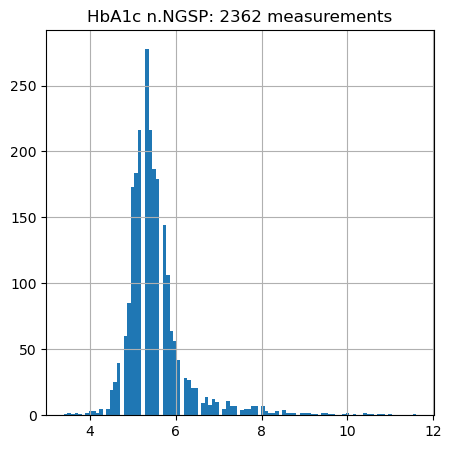

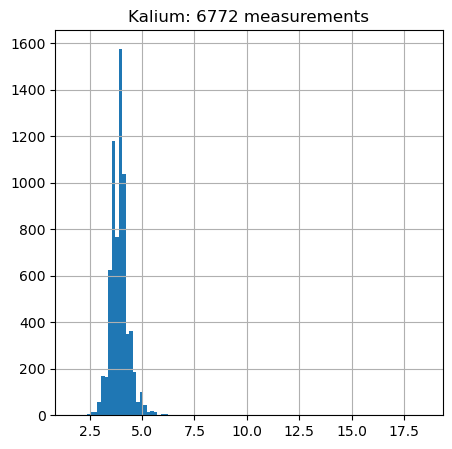

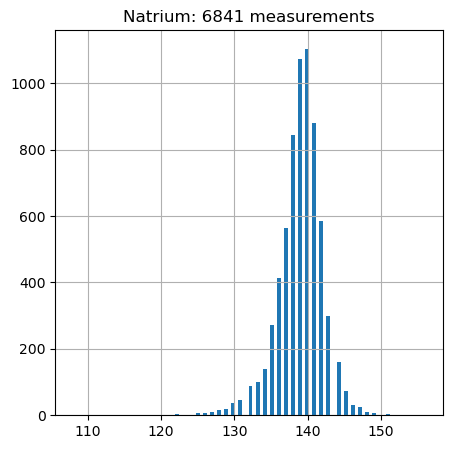

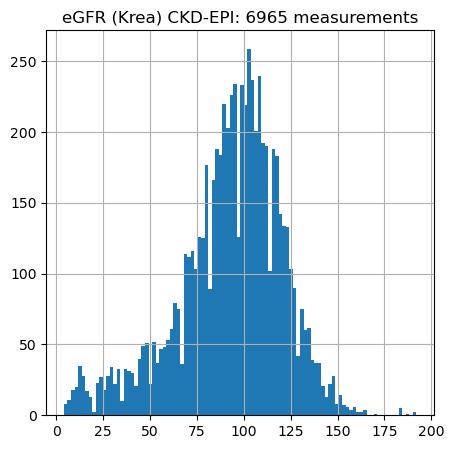

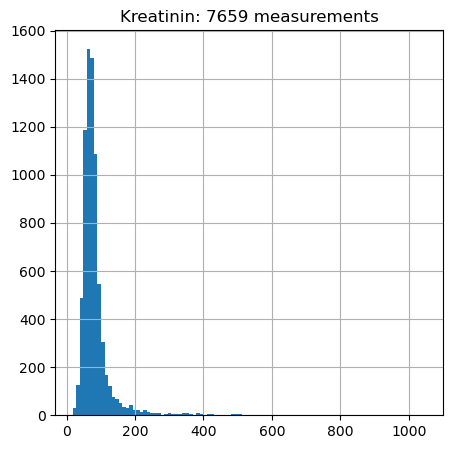

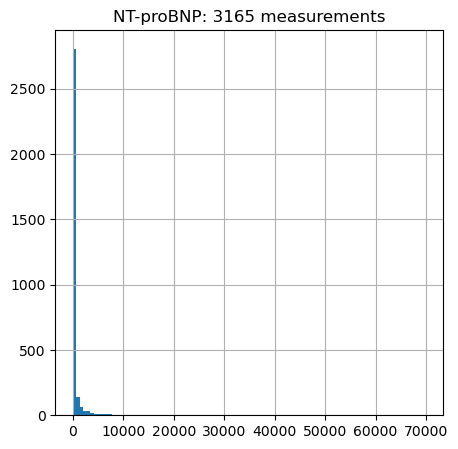

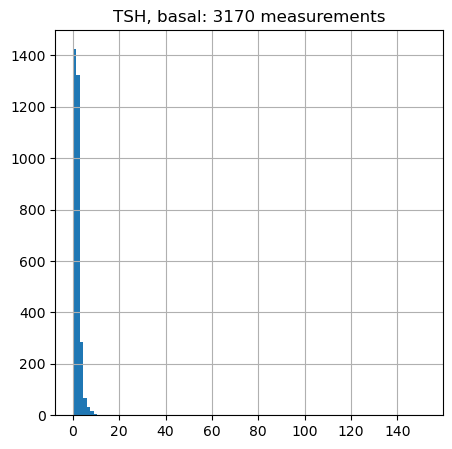

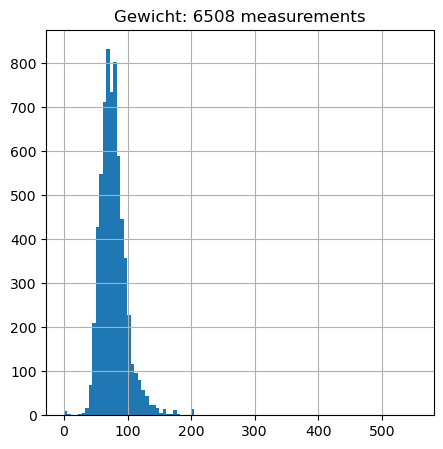

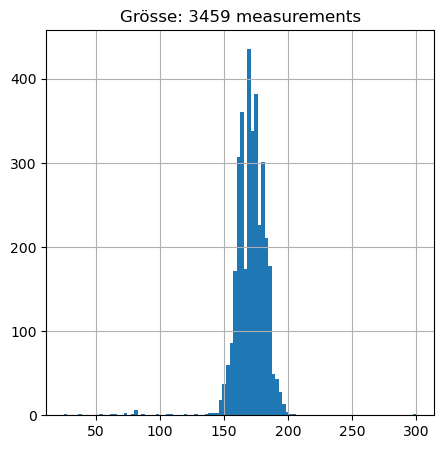

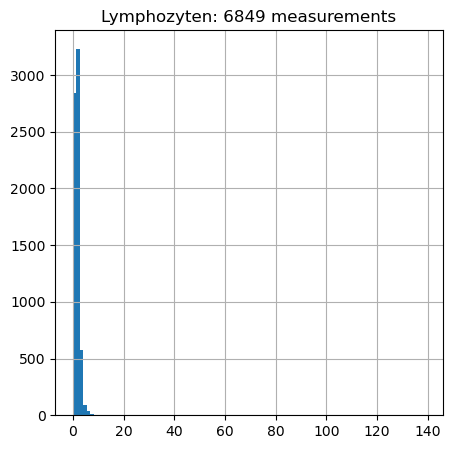

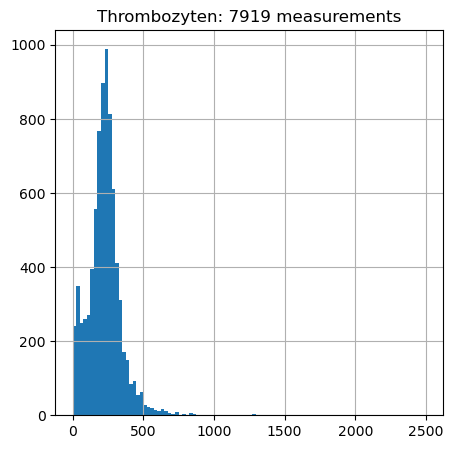

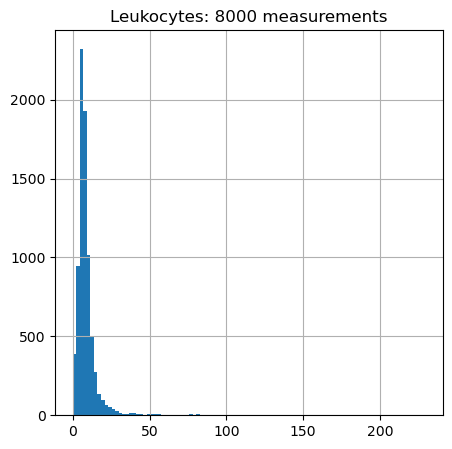

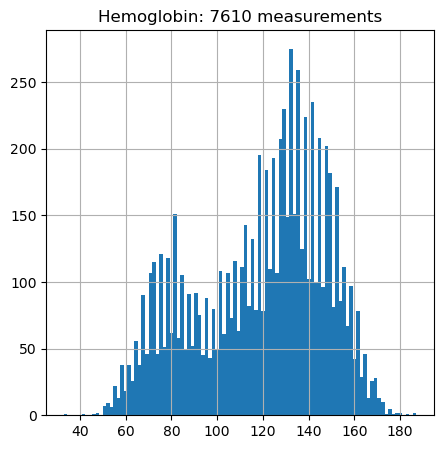

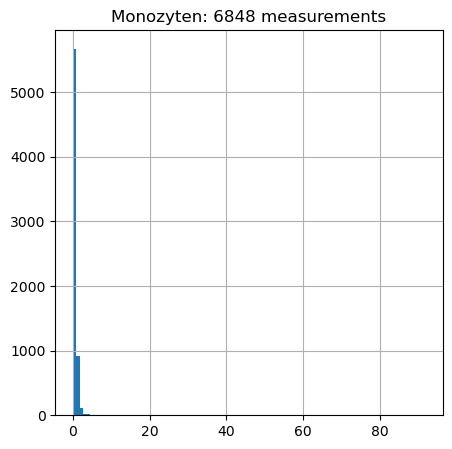

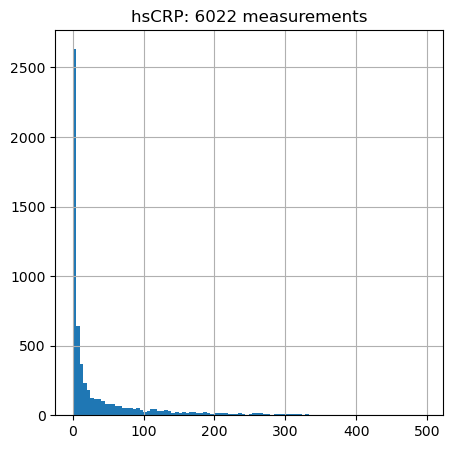

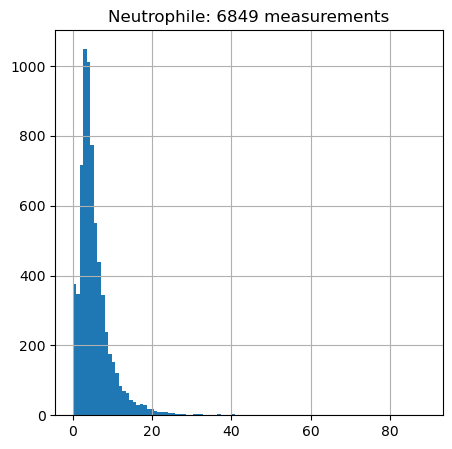

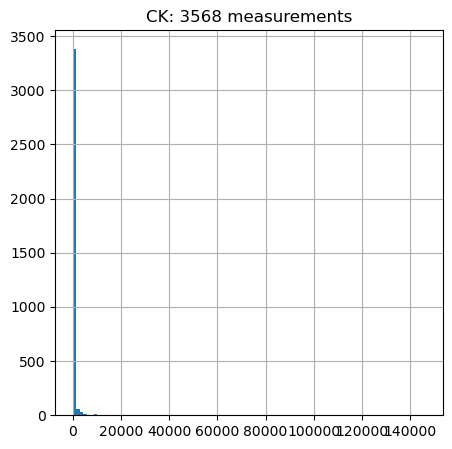

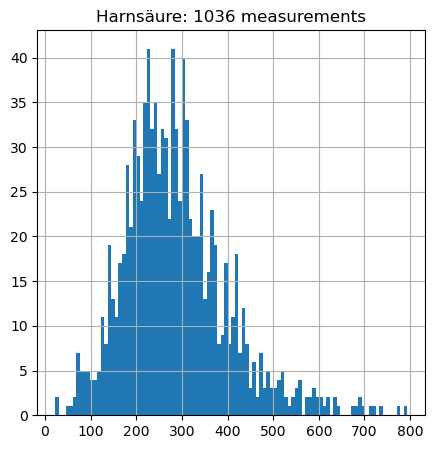

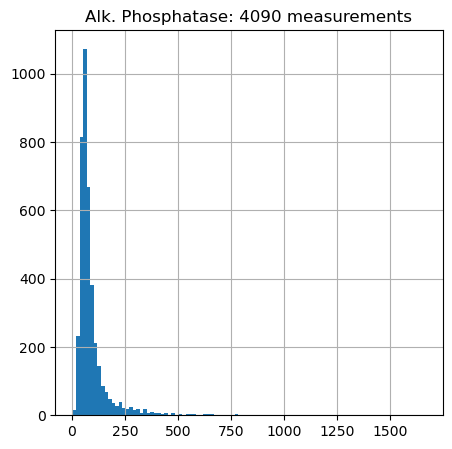

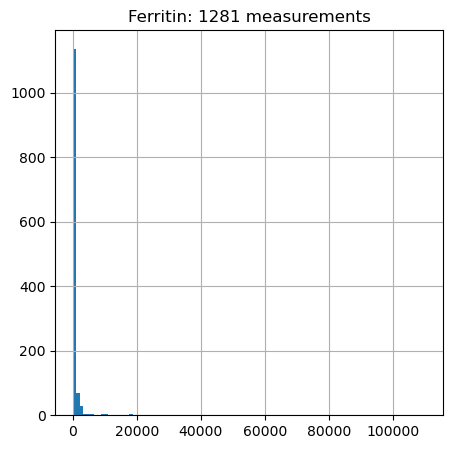

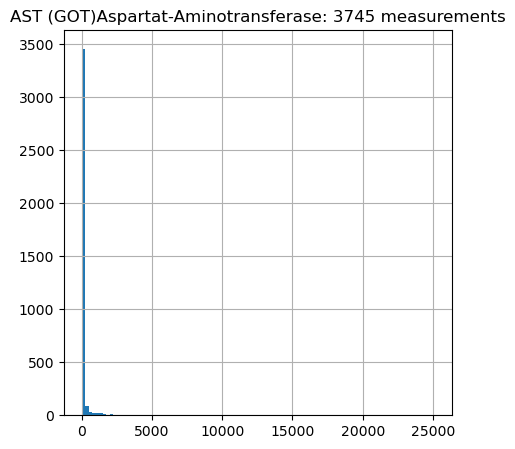

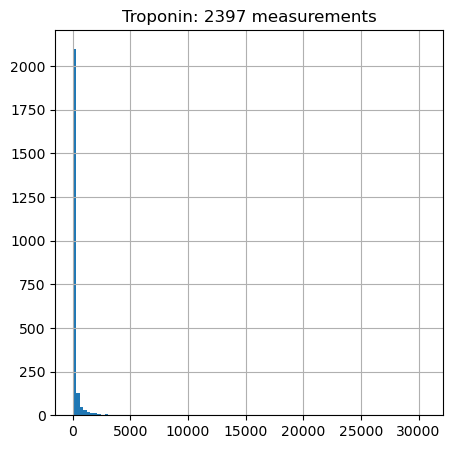

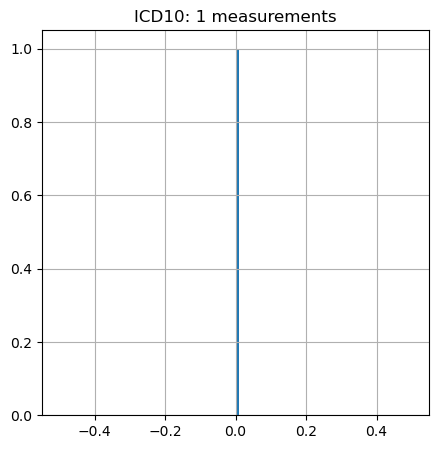

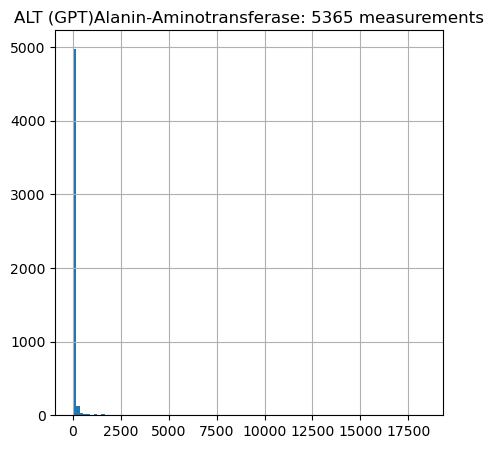

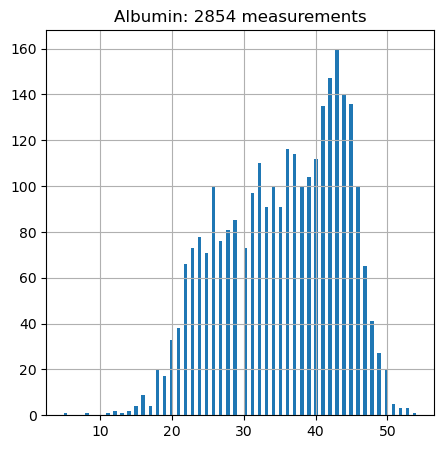

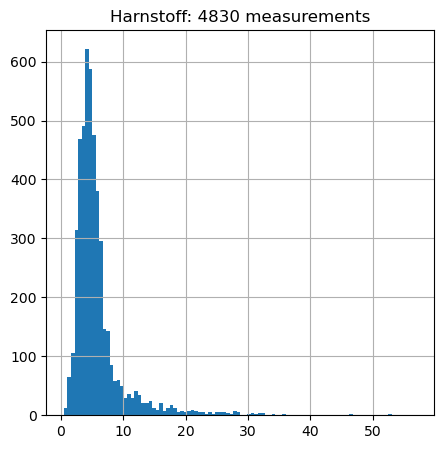

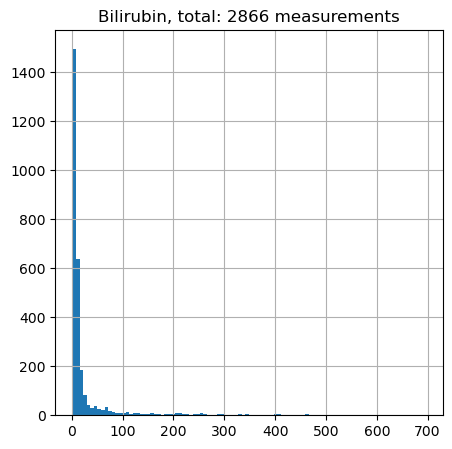

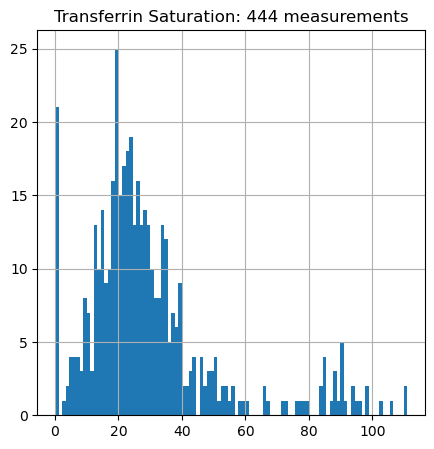

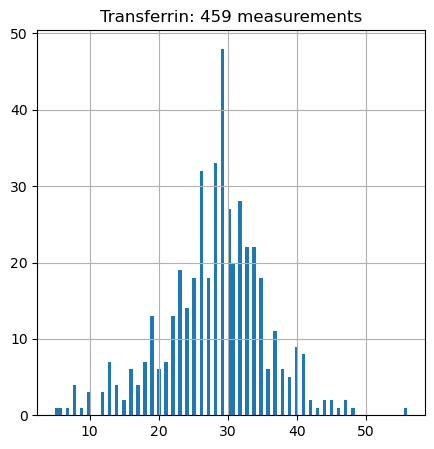

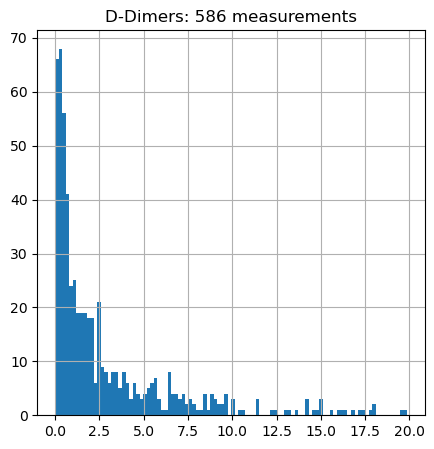

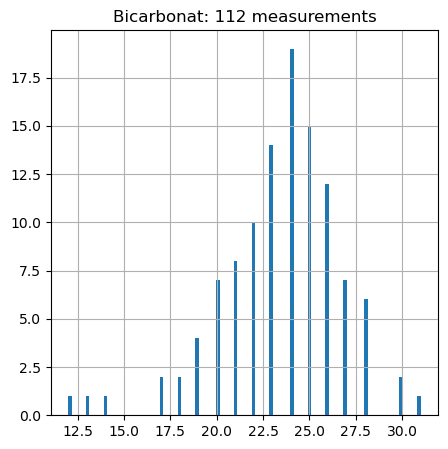

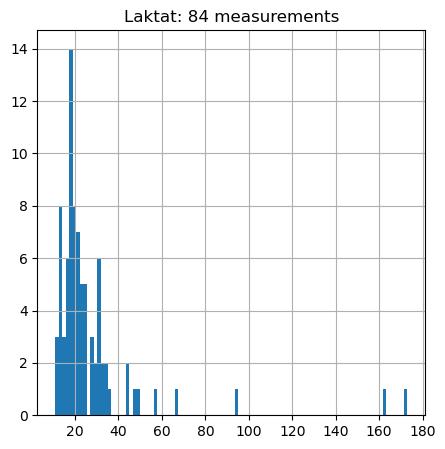

In [5]:
for measurement in measurements:
    measurement_df = df[df["name"] == measurement]
    measurement_df["value"] = pd.to_numeric(measurement_df["value"], errors="coerce")
    measurement_df = measurement_df[measurement_df["value"].notnull()]
    measurement_df["value"].hist(bins=100, figsize=(5,5))
    plt.title("{}: {} measurements".format(measurement, measurement_df.shape[0]))
    plt.show()

Number of measurements per patient distribution.

Text(0, 0.5, 'number of people')

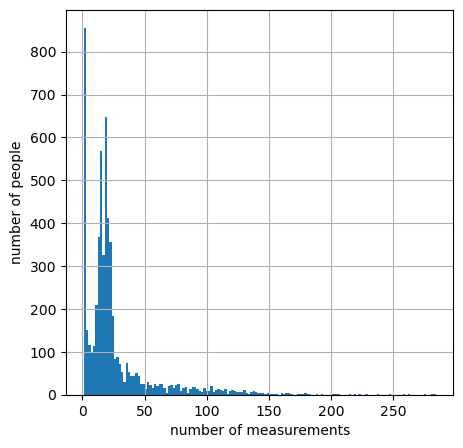

In [6]:
patients = df.groupby(["Pat_ResearchID", "Fall_ResearchID"])["name"].count()
patients.hist(bins=150, figsize=(5,5))
plt.xlabel("number of measurements")
plt.ylabel("number of people")


Max time between two measurements per patient distribution.

In [89]:
df["datetime"] = df.apply(lambda x: pd.to_datetime(x["zeitstempel_y"]), axis=1)

<AxesSubplot:>

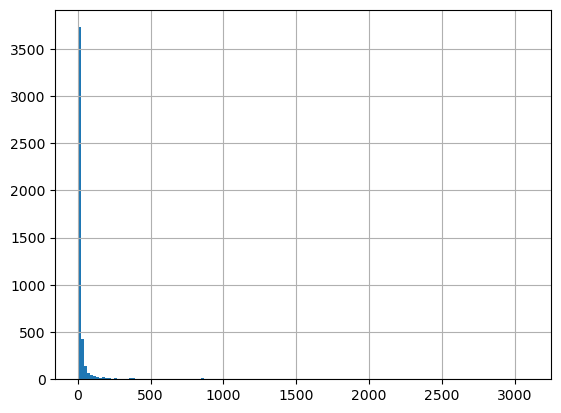

In [110]:
patients = df.groupby("Pat_ResearchID").agg({"datetime": ["min", "max"]})
patients.columns = ["_".join(col_name).rstrip('_') for col_name in patients.columns]   
patients["max_time_delta"] = patients["datetime_max"] - patients["datetime_min"]
patients["max_time_delta"].dt.days.hist(bins=150)

## Connection to Normal Cohort
Normal cohort contains about 4000 patients. Most patient have one measurement/row with a very small fraction having two. The code below finds the size of the overlap of these patients and patients in the all_clinical_vars_normal_cohort_LR.csv. 
We also analyse the distribution of measurements per patients in this overlap.

In [8]:
normal_cohort_path = "../normal_cohort_echo_reports.csv"
normal_cohort_df = pd.read_csv(normal_cohort_path)

4023 patients in normal cohort that also have at least one measurement of a clinical variable


Text(0.5, 0, 'number of measurements')

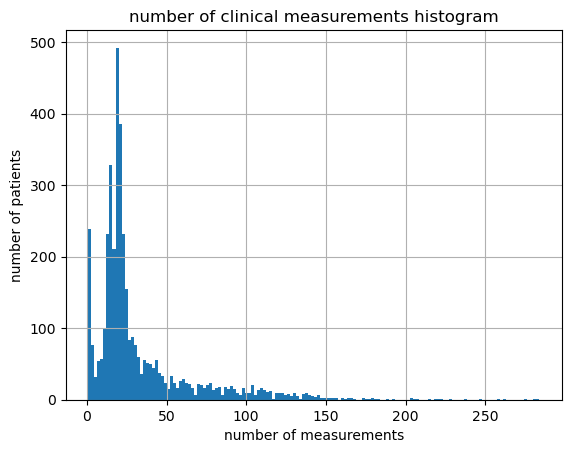

In [9]:
normal_cohort_patients = pd.DataFrame(normal_cohort_df["Pat_ResearchID"].unique(), columns=["Pat_ResearchID"]).set_index("Pat_ResearchID")
all_clinical_vars_patients = df.groupby("Pat_ResearchID")["name"].count()
patients_in_both = normal_cohort_patients.join(all_clinical_vars_patients, how="inner")
print("{} patients in normal cohort that also have at least one measurement of a clinical variable".format(patients_in_both.shape[0]))
patients_in_both.hist(bins=150)
plt.title("number of clinical measurements histogram")
plt.ylabel("number of patients")
plt.xlabel("number of measurements")
